In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm

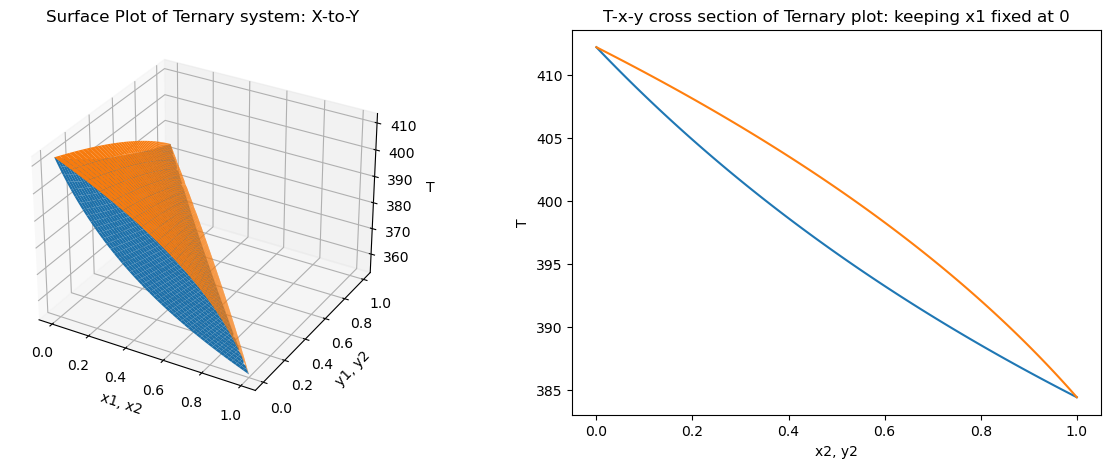

In [3]:
# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)

# Create a Raoult's law object
TolBenXylSys = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])
TolBenXylSys.plot_ternary_txy(100, keep_zero=0)

In [ ]:
distillation_model = DistillationModel(TolBenXylSys, xF =  np.array([0.4,0.3,0.3]), xB = np.array([0.8,0.1,0.1]), xD=np.array([0.2,0.1,0.7]), reflux = 2, boil_up= 2)
fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
distillation_model.plot_distil_binary(axs=axs)

ValueError: Underspecification or overspecification: only 2 variables between reflux, boil up, and q can be provided